### Import Libraries

In [67]:
#Import all Libraries 
import pandas as pd
import numpy as np
import pandas as pd #Python pakage which is  fast,flexible to work on structural data
import numpy as np #Numeric  python core library for scientific computing
import sys  #used to manipulate different parts of the Python runtime environment.
import os #To interact with File system
import seaborn as sns #to plot interactive plots
import matplotlib.pyplot as plt  # for plottingcs 
import scipy.stats #statistics for data analysisfrom scipy import stats
from scipy import stats #statistics for data analysisfrom scipy import stats
from scipy.stats import ttest_ind #WHich is used to test variance in groups of two means
import operator #having standard operators as function like add, sub,sort etc.
import sklearn.model_selection as ms #Goint use for Train test split
import numpy.random as nr #generate seeds for random numbers
from sklearn import linear_model #for logistic regression model

from sklearn.metrics import confusion_matrix # to get confusion matrix
from sklearn.metrics import balanced_accuracy_score #to get balance accuracy score of the Model
from sklearn.neighbors import KNeighborsClassifier #For KNearest Neighbour Model
#Handling Imbalance data using synthetic dataset
from imblearn.over_sampling import SMOTE #for creating synthetic data
#Try Random Forest Algorithm 

from sklearn.ensemble import RandomForestClassifier #to build random forest model
from sklearn.utils import resample #for resampling data
from sklearn.linear_model import Lasso, LogisticRegression #for feature selection
from sklearn.feature_selection import SelectFromModel #for feature selection
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC # "Support Vector Classifier" 


In [57]:
# Create all the methods which are going to use in the workbook

def  create_frequncy_tables_plot(data,col_categorical):
    """ This  function will take the data frame and categorical columns as input and
    will give the counts and  proportions of each label  in univariate categorical variables
    """
    # couunts  using  count_values and  proportions using cross table 
    cross_tab=pd.crosstab(col_categorical ,columns="count")

    cross_tab=pd.crosstab(col_categorical ,columns="count_percentage").apply(lambda r: r/len(data), axis=1)
    return churn_customers,cross_tab
    

    

def change_data_type(data,col_names,convert_type):
    
    """" This  function will take the data frame and  columns  and conversion type as input  
      will give the  converted  columns from one datatype to  another datatype
    """
    for col in col_names:
        print(col ,  "before  convert" , data[col].dtype)
        data[col] = data[col].astype(convert_type)
        print(col,"after convert",data[col].dtype)
    return data



def box_plot(data,variables):
    """
    This Function will take the Input as Data and List of variables and plot the Boxplot
    """
    for i in variables:
        
        sns.set(style="whitegrid")
        tips = sns.load_dataset("tips")
        ax = sns.boxplot(x=data[i])
        plt.show()

        
def treat_outlier(data,numeric_columns):
    """  This  function will take the input as data frame and numeric values  and return output  dataframe 
           after  treating the outliers"""
    for i in numeric_columns:
        print(i)
        q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
        iqr = q75 - q25
        mini = q25 - (iqr*1.5)
        maxi = q75 + (iqr*1.5)
        print(mini)
        print(maxi)
        data_outlier = data.drop(data[data.loc[:,i] < mini].index)
        data_outlier = data.drop(data[data.loc[:,i] > maxi].index)
    return  data_outlier


def fun_numeric_relation(data):
    """" This function will give  output of  plot of relationship between numeric variables in  data frame  """
    f, ax = plt.subplots(figsize=(8, 6))
    corr = data.corr()
    print(corr)
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

def perform_ttest(data,num_cols,target_col): 
    """
    This function will take input as data, numeric independent variables and categorical target variable
    and give output of ttest p-values in Dictionary
    """
    ttest_dict = []
    for var in num_cols:
        
        f,p = ttest_ind(data[var][data[target_col] == 0], 
                 data[var][data[target_col] == 1],equal_var = False
         )
        ttest_dict.append((var,p))
        
        
    #sorted_new = [(name, "%.150f" % float(x)) for name,x in ttest_dict]  
    return ttest_dict

def plot_box(data, cols, col_x):
    """" This  function will display the  box plot, to show  relationship between  numeric 
    variables(Cols) and and target categorical variable (Col_x)
      """
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
def standardform_convert(data ,numeric_columns):
    """  This  functin will take  input as data frame and numerical columns  and convert those numerical data into  standardization
    form  and  gives  output and converted data frame"""
    for i in numeric_columns:
        #print(i)
        data[i] = (data[i] - data[i].mean())/data[i].std()
    return data

def get_metries(y_test1, y_pred1):
    
    """This Function will take input as y_test and y_pred and get the metrices like
     i. sensitivity
     ii. specificity
     iii. pos_pred_val
     iv. neg_pred_val
     v. prevalence
     vi. balanced_score
    """
    CM_logistic = confusion_matrix(y_test1, y_pred1)
    print(CM_logistic)
    TN = CM_logistic[0][0]
    FN = CM_logistic[1][0]
    TP = CM_logistic[1][1]
    FP = CM_logistic[0][1]

    # tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    # sensitivity,specificity = tp/(tp+fn),tn/(tn+fp)
    sensitivity  = TP / (TP+FN)
    specificity  = TN / (TN+FP)
    pos_pred_val = TP/ (TP+FP)
    neg_pred_val = TN/ (TN+FN)
    prevalence = TP /(TP+FP+TN+FN )
    balanced_score = balanced_accuracy_score(y_test1, y_pred1)

    print("Sensitivity is : {}".format(round(sensitivity,3)))
    print("specificity is : {}".format(round(specificity,3)))
    print("Pos Pred Value is : {} ".format(round(pos_pred_val,3)))
    print("Neg Pred Value is : {} ".format(round(neg_pred_val,3)))
    print("prevalence is : {} ".format(round(prevalence,3)))
    print("balanced_score is : {} ".format(round(balanced_score,3)))
    precision, recall, fscore, support = score(y_test, y_pred)
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
  

### Loading Train and Test Data

In [4]:
# Set the   Working Directory

os.getcwd()

#change working directory

os.chdir("D:/data science prsctise")
os.getcwd()

'D:\\data science prsctise'

In [5]:
# Load Train and test data

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [6]:
#Anallye the train and test data
train_data.head()
print(train_data.shape)

#Train datset contains 
#202 columns and 200000 records
test_data.head()
print(test_data.shape)

#Test data contains 
#201 columns and 200000 records

(200000, 202)
(200000, 201)


In [7]:
#check the datatype of Trains and test variables

#print(train_data.info())
print(train_data.info())

#dtypes: float64(200), int64(1), object(1)
#So 200 variables are float type and 1 variable is int type and  1 variable in object type

#check the dtypes of test data

print(test_data.info())

#dtypes: float64(200), object(1)
#200 variables are float type and 1 variable is object type

 #check the column  which is having dtype= object
    
print(list(train_data.select_dtypes(include=['object'])))
print(list(test_data.select_dtypes(include=['object'])))

#ID_code is object type which is making sense

# all the numeric variables are in float type and target variable is having int type(actually it should be categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
None
['ID_code']
['ID_code']


### Univariate Analysis

0    179902
1     20098
Name: target, dtype: int64
0    89.951
1    10.049
Name: target, dtype: float64


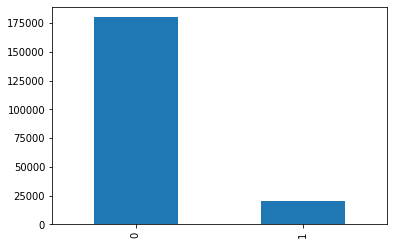

In [8]:
# Analyse the distribution of target variable

#Analys the distribution of target value in train data
train_data['target'].value_counts().plot(kind='bar')

#check the percentage of each value 0 & 1 in target variable
print(train_data['target'].value_counts())
print(train_data['target'].value_counts(normalize = True)  *100)

#Transactions data is 10.049 and non transaction data is 89.951

#0    89.951
#1    10.049

#Might be chance of facing data imbalance have to be careful during modelling stage whike measuring the accuracy

In [9]:
#Below is the Distrivution of top 20 Correlated variables with Target variable based on ttest
# Now check the distribution of Numeric variables
pd.set_option("display.max_columns", None)

train_data.describe()

#Below are the quick observation

# data is closely distributed  min max and standard distribution is looking quick close

#might be less chance of  getting outliers 

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

### Missing Values Analysis

In [10]:
#Check missing values in Train and test data

print("Total missing values in Train data : " , train_data.isnull().sum().sum())
print("Total missing values in Test data : " , test_data.isnull().sum().sum())

#There are no missing values in train and test Dataset

Total missing values in Train data :  0
Total missing values in Test data :  0


### Outlier Anlaysis

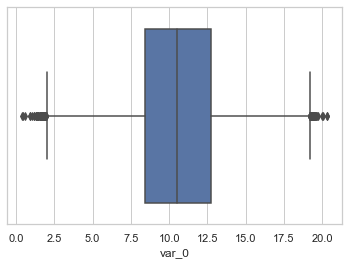

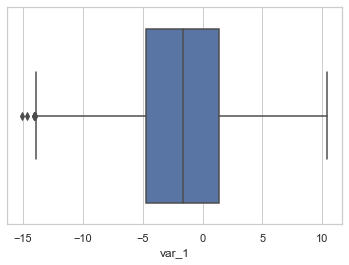

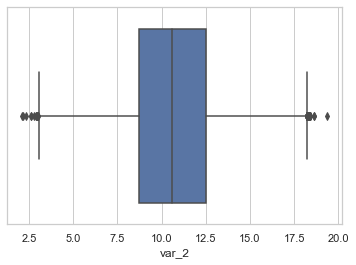

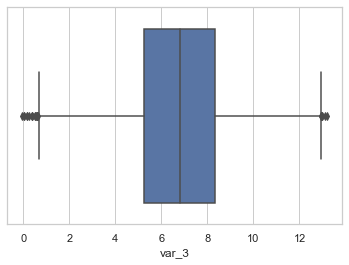

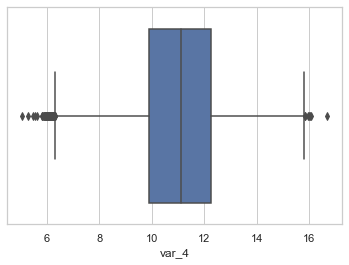

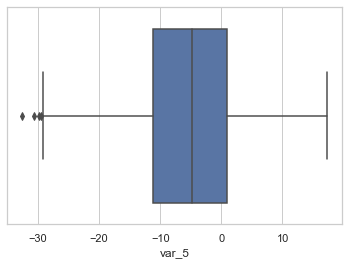

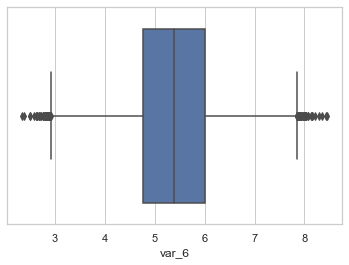

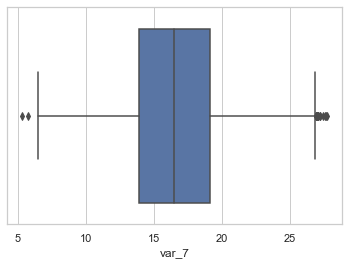

In [11]:
#Call the Boxplot function and pass first 10 varables to the function
box_plot(train_data,train_data.columns[2:10])

#This below plots clearly showing that there are few outliers in the variables 
# but which are very near to the lower/Upper extreme boundries
#This is also one the sign data is closely distributed

In [12]:
#Lets check dataset after removing the outliers
#As we have all independlent variables are Numeric type so it is better to check outliers of the variables

#Analyse if outliers are present in the variables


train_outlier = treat_outlier(train_data,train_data.columns[2:])

var_0
1.9973250000000018
19.214725
var_1
-13.888000000000002
10.5066
var_2
3.031137499999998
18.208037500000003
var_3
0.6490375000000013
12.9291375
var_4
6.316249999999997
15.828050000000005
var_5
-29.388075
19.112525
var_6
2.91475
7.855949999999998
var_7
6.205149999999996
26.841550000000005
var_8
-10.20135
10.821449999999999
var_9
3.6703625000000013
11.532862499999998
var_10
-15.561762500000002
16.349737500000003
var_11
-20.0557375
13.397962499999998
var_12
13.488700000000001
14.569499999999998
var_13
-5.7301625
23.077737499999998
var_14
0.549050000000002
14.503249999999998
var_15
13.345250000000002
15.792049999999998
var_16
2.0468375000000014
16.4613375
var_17
-24.974400000000003
13.687400000000004
var_18
-8.575112500000007
38.76638750000001
var_19
-11.958762499999995
36.6685375
var_20
-5.249599999999999
31.7568
var_21
-5.75607500000001
40.39612500000001
var_22
-3.983799999999999
12.459399999999999
var_23
1.4795500000000004
4.55835
var_24
-1.1869000000000014
22.2795
var_25
12.8454500

In [13]:
#Shape of Data Frame before treating Outlier
print(train_data.shape)
#Shape of dataframe after treating outlier
print(train_outlier.shape)

# Asp per the  IQR Range there is no data points has been removed from the data
#No need to remove any data eventhough boxplots is showingfew outliers

(200000, 202)
(200000, 202)


### Feature Engineer

           var_1     var_2     var_3     var_4     var_5     var_6     var_7  \
var_1   1.000000  0.003980  0.000010  0.000303 -0.000902  0.003258  0.001511   
var_2   0.003980  1.000000  0.001001  0.000723  0.001569  0.000883 -0.000991   
var_3   0.000010  0.001001  1.000000 -0.000322  0.003253 -0.000774  0.002500   
var_4   0.000303  0.000723 -0.000322  1.000000 -0.001368  0.000049  0.004549   
var_5  -0.000902  0.001569  0.003253 -0.001368  1.000000  0.002588 -0.000995   
var_6   0.003258  0.000883 -0.000774  0.000049  0.002588  1.000000 -0.002548   
var_7   0.001511 -0.000991  0.002500  0.004549 -0.000995 -0.002548  1.000000   
var_8   0.004098  0.002648  0.003553  0.001194  0.000147 -0.001188  0.000814   
var_9  -0.000832 -0.001932 -0.000826 -0.000918 -0.005279 -0.005697  0.002885   
var_10  0.002875 -0.000474 -0.000897 -0.003445  0.000332  0.001503  0.000359   
var_11  0.004778  0.005180  0.000482  0.000780 -0.001072 -0.000549  0.000905   
var_12 -0.001977 -0.003781 -0.001794  0.

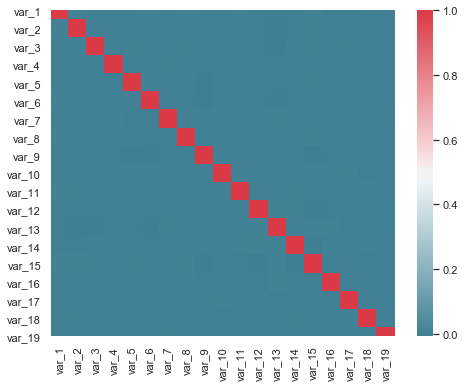

In [14]:
# Analyze the relationship between Independent variables using correlation plot

fun_numeric_relation(train_data[train_data.columns[2:][1:20]])

#This plot is hsowing almost blue that is there is no relation between the independent variables 
#So its is clearly satisfying the conditions of regression that there should not be any relation between 
#Independent Variables


In [15]:
#Analyse the Relation between numeric & Independent variables
#The independent t-test is used to compare the means of a condition between 2 groups

ttest_dict = perform_ttest(train_data,train_data.columns[2:],'target')

#order the values in dictionary based on p-values

sorted_new = [(name, "%.150f" % float(x)) for name,x in ttest_dict]  
sorted_new.sort(key=operator.itemgetter(1))


In [16]:

# As per hypothesis test if p-value <= 0.05 than rejecting null hypoythesis and accepting alternative hypothesis
# so there is relation between the variables are very high
#if p-value > 0.05 than accepting Null hypothesis which says the relationship between target variable and 
#Independent variables is less

imp_variables = [x[0] for x in ttest_dict if float(x[1]) < 0.05]
#list(filter( lambda p: p[] > 0.05, sorted_new))
non_imp_var = [x[0] for x in ttest_dict if float(x[1]) > 0.05]


In [17]:
#imp_variables[0:20]
print("Important Variables are {}".format(len(imp_variables)))

#Non Important Variables are
print("Non Important Variables are {}".format(len(non_imp_var)))

# Important Variables are 181
# Non Important Variables are 19

Important Variables are 181
Non Important Variables are 19


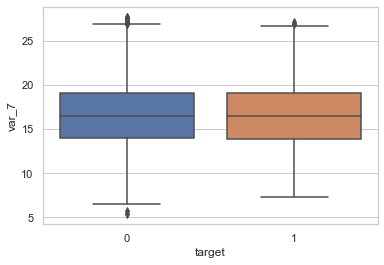

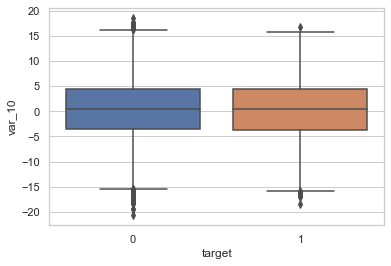

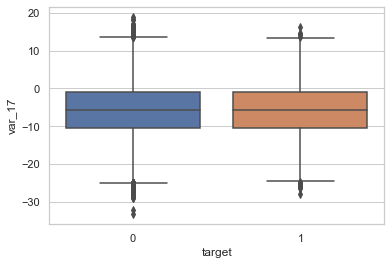

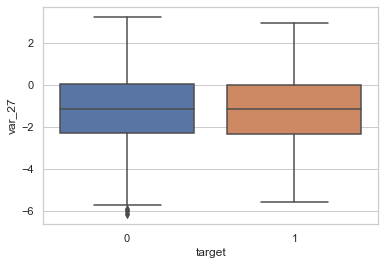

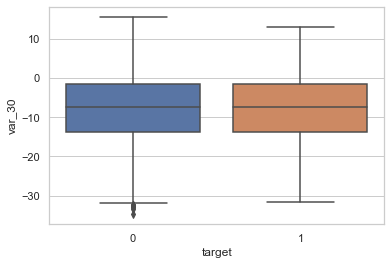

In [18]:
#Just for visualizing the   mean of groups plot the boxplot

plot_box(train_data,non_imp_var[0:5],'target')

# per ther below boxplot there is less diffrence betwen the mean of two groups
#so, t-test result we can remove this variables from the dataset

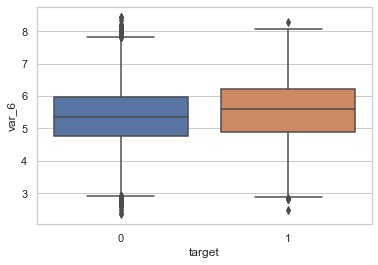

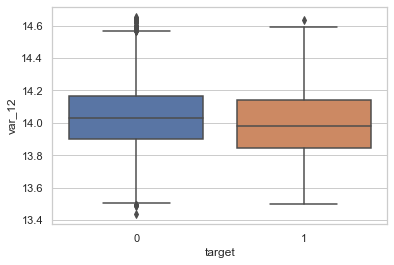

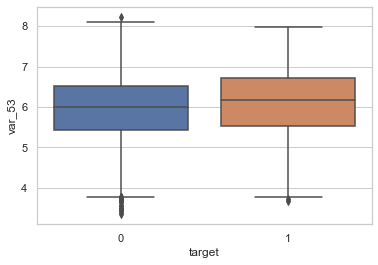

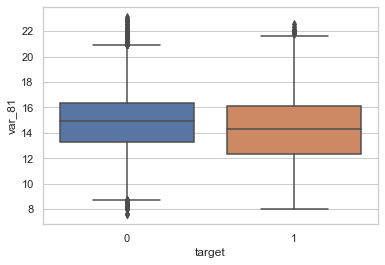

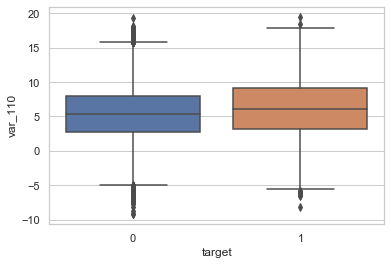

In [19]:
#As per t-test analyse the relation between top 5 low p-value variables  with target variable
#using boxplot

[top_imp_variables] = [[t[0] for t in sorted_new]]
plot_box(train_data,top_imp_variables[0:5],'target')

#Here in boxplot there is difference between the median is showing clearly but its less
#because data is closeely distributed


### Feature Scaling

In [20]:
#standardizing the independent variables is a simple method to reduce multicollinearity that is produced by higher-order terms

train_data = standardform_convert(train_data,imp_variables)
test_data = standardform_convert(test_data,imp_variables)
print(train_data.shape)
print(test_data.shape)



(200000, 202)
(200000, 201)


In [21]:
#Split the dataset into train and test
#Since we have have procedure to evaluate the model
#so splitting train data to train and test data contain train data 75% and test data 25%
X_train, X_test, y_train, y_test = ms.train_test_split(train_data[imp_variables], train_data['target'], test_size=0.25,random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(150000, 181) (150000,)
(50000, 181) (50000,)


### Modelling

In [51]:
#Build Logitic regression model on Data set
#Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression)
#is estimating the parameters of a logistic model (a form of binary regression).

logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

#here we are constructing logistic model by taking default parameters

# C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Predict the model on test data
y_pred = logistic_mod.predict(X_test)

print(y_pred)

[0 1 0 ... 1 1 1]


In [53]:
get_metries(y_test, y_pred)

# [[44312   592]
#  [ 3748  1348]]
# Sensitivity is : 0.265 
# specificity is : 0.987
# Pos Pred Value is : 0.695 
# Neg Pred Value is : 0.922 
# prevalence is : 0.027 
# # balanced_score is : 0.626 
# precision: [0.96823712 0.29632702]
# recall: [0.79222341 0.77099686]
# fscore: [0.8714312  0.42811223]
#If we see the above metrices Precision and recall is very less
# Might be because of Unbalance data
#we have to chec the metrices for other algorithm


[[35574  9330]
 [ 1167  3929]]
Sensitivity is : 0.771
specificity is : 0.792
Pos Pred Value is : 0.296 
Neg Pred Value is : 0.968 
prevalence is : 0.079 
balanced_score is : 0.782 
precision: [0.96823712 0.29632702]
recall: [0.79222341 0.77099686]
fscore: [0.8714312  0.42811223]
support: [44904  5096]


In [ ]:
# # Construct Knn Algorithm


#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)


In [ ]:
get_metries(y_test, y_pred_knn)

# [[44312   472]
#  [ 3748  1348]]
# Sensitivity is : 0.231
# specificity is : 0.991
# Pos Pred Value is : 0.579 
# Neg Pred Value is : 0.911
# prevalence is : 0.019
# balanced_score is : 0.568

# precision: [0.97823712 0.23632702]
# recall: [0.75222341 0.76099686]
# fscore: [0.9114312  0.38811223]

In [ ]:
#Build Random Forest Model

rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
get_metries(y_test, rfc_pred)

# [[44312   72]
#  [ 4148  1348]]
# Sensitivity is : 0.081
# specificity is : 0.991
# Pos Pred Value is : 0.332
# Neg Pred Value is : 0.923
# prevalence is : 0.013
# balanced_score is : 0.346

# precision: [0.94823712 0.03632702]
    # recall: [0.69222341 0.74099686]
# fscore: [0.8914312  0.41811223]

### Data Imbalance

In [25]:
# #Resampling Techniques — Oversample minority class
# Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
# We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_transact = train_data[train_data.target==0]
transact = train_data[train_data.target==1]

transact_upsampled = resample(transact,
                          replace=True, # sample with replacement
                          n_samples=len(not_transact), # match number in majority class
                          random_state=27) # reproducible results


upsampled = pd.concat([not_transact, transact_upsampled])

# check new class counts
upsampled.target.value_counts()
  

1    179902
0    179902
Name: target, dtype: int64

In [30]:
#Now Build Logistic regression on data
# trying logistic regression again with the balanced dataset
y_train_us = upsampled.target
X_train_us = upsampled.drop('target', axis=1)

upsampled = linear_model.LogisticRegression(solver='liblinear').fit(X_train_us[imp_variables], y_train_us)


NameError: name 'LogisticRegression' is not defined

In [26]:
# Undersample majority class

#Undersampling can be defined as removing some observations of the majority class. 
#Undersampling can be a good choice when you have a ton of data -think millions of rows

not_transact_down_sample = resample(not_transact,
                                replace = False, # sample without replacement
                                n_samples = len(transact), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_transact_down_sample, transact])

# checking counts
downsampled.target.value_counts()

1    20098
0    20098
Name: target, dtype: int64

In [30]:
y_train_ds = downsampled.target
X_train_ds = downsampled.drop('target', axis=1)

undersampled = linear_model.LogisticRegression(solver='liblinear').fit(X_train_ds[imp_variables], y_train_ds)

undersampled_pred = undersampled.predict(X_test)

In [54]:
get_metries(y_test,undersampled_pred)

# [[35264  9640]
#  [ 1104  3992]]
# Sensitivity is : 0.783
# specificity is : 0.785
# Pos Pred Value is : 0.293 
# Neg Pred Value is : 0.97 
# prevalence is : 0.08 
# balanced_score is : 0.784 
# precision: [0.96964364 0.29284038]
# recall: [0.78531979 0.7833595 ]
# fscore: [0.86780195 0.42631354]
# support: [44904  5096]

[[35264  9640]
 [ 1104  3992]]
Sensitivity is : 0.783
specificity is : 0.785
Pos Pred Value is : 0.293 
Neg Pred Value is : 0.97 
prevalence is : 0.08 
balanced_score is : 0.784 
precision: [0.96964364 0.29284038]
recall: [0.78531979 0.7833595 ]
fscore: [0.86780195 0.42631354]
support: [44904  5096]


In [58]:
# # SMOTE
# A technique similar to upsampling is to create synthetic samples. 
#Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. 
#SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [59]:

smote_logistic = linear_model.LogisticRegression(solver='liblinear').fit(X_train[imp_variables], y_train)

smote_pred = smote_logistic.predict(X_test)

In [60]:
get_metries(y_test,smote_pred)

# [[35574  9330]
#  [ 1167  3929]]
# Sensitivity is : 0.771
# specificity is : 0.792
# Pos Pred Value is : 0.296 
# Neg Pred Value is : 0.968 
# prevalence is : 0.079 
# balanced_score is : 0.782 
# precision: [0.96823712 0.29632702]
# recall: [0.79222341 0.77099686]
# fscore: [0.8714312  0.42811223]
# support: [44904  5096]

[[35574  9330]
 [ 1167  3929]]
Sensitivity is : 0.771
specificity is : 0.792
Pos Pred Value is : 0.296 
Neg Pred Value is : 0.968 
prevalence is : 0.079 
balanced_score is : 0.782 
precision: [0.96823712 0.29632702]
recall: [0.79222341 0.77099686]
fscore: [0.8714312  0.42811223]
support: [44904  5096]


In [ ]:
mode_svc = SVC(C=1.0, kernel='linear', class_weight='balanced')
mode_svc.fit(X_train[imp_variables], y_train)